In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/bda
!ls

/content/drive/MyDrive/bda
CK+48  data  data_full.zip  fer2013.csv  fer_model.h5  metadata_processed.csv  Model.h5  output


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
data = pd.read_csv("fer2013.csv")
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
data = data.rename(columns={"emotion":"label","pixels":"image"})

In [ ]:
data['emotion'] = data['label'].apply(lambda x: emotions[int(x)])
data

,label,image,Usage,emotion
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training,Angry
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training,Angry
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training,Fear
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training,Sad
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training,Neutral
...,...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest,Neutral
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest,Happy
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest,Angry
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest,Happy


In [ ]:
data.drop(columns=['Usage'],inplace=True)

In [ ]:
data

,label,image,emotion
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Angry
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Angry
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Fear
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Sad
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Neutral
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,Neutral
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,Happy
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,Angry
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,Happy


<Axes: xlabel='emotion', ylabel='count'>

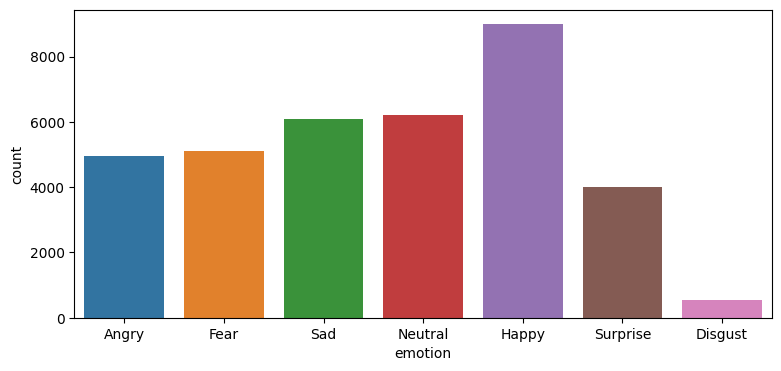

In [ ]:
import seaborn as sns
plt.figure(figsize=(9,4))
sns.countplot(x='emotion', data=data)

In [ ]:
m = data.groupby('label').count().mean().values[0]
oversampled = pd.DataFrame()
for emotion in emotions:
    print('\n' + emotion)
    l = len(data[data.emotion==emotion])
    print('Before sampling: ' + str(l))

    if (l>=m):
        df = data[data.emotion==emotion].sample(int(m))
        oversampled = oversampled.append(df)
        print('Ater sampling: ' + str(len(df)))
    else:
        frac = int(m/l)
        df = pd.DataFrame()
        for i in range(frac+1):
            df = df.append(data[data.emotion==emotion])
        df = df[df.emotion==emotion].sample(int(m))
        oversampled = oversampled.append(df)
        print('Ater sampling: ' + str(len(df)))

oversampled = oversampled.sample(frac=1).reset_index().drop(columns=['index'])


Angry
Before sampling: 4953
Ater sampling: 5126

Disgust
Before sampling: 547
Ater sampling: 5126

Fear
Before sampling: 5121
Ater sampling: 5126

Happy
Before sampling: 8989
Ater sampling: 5126

Sad
Before sampling: 6077
Ater sampling: 5126

Surprise
Before sampling: 4002
Ater sampling: 5126

Neutral
Before sampling: 6198
Ater sampling: 5126


<ipython-input-10-921221afb939>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data[data.emotion==emotion])
<ipython-input-10-921221afb939>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data[data.emotion==emotion])
<ipython-input-10-921221afb939>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  oversampled = oversampled.append(df)
<ipython-input-10-921221afb939>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data[data.emotion==emotion])
<ipython-input-10-921221afb939>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use p

In [ ]:
#save the oversampled dataset
oversampled.to_csv('metadata_processed.csv', index=False)

In [ ]:
data = pd.read_csv("metadata_processed.csv")

<Axes: xlabel='emotion', ylabel='count'>

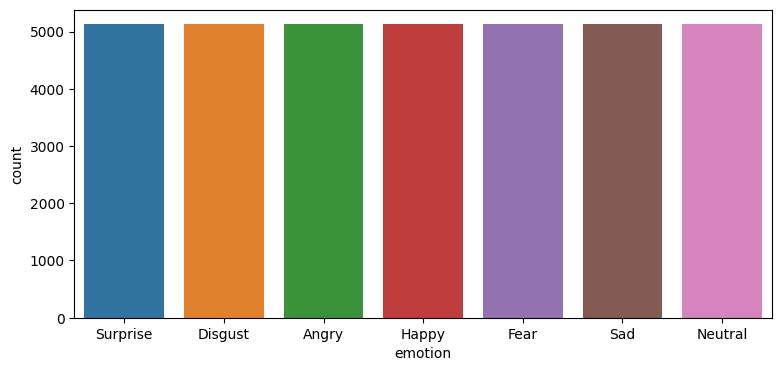

In [ ]:
plt.figure(figsize=(9,4))
sns.countplot(x='emotion', data=data)

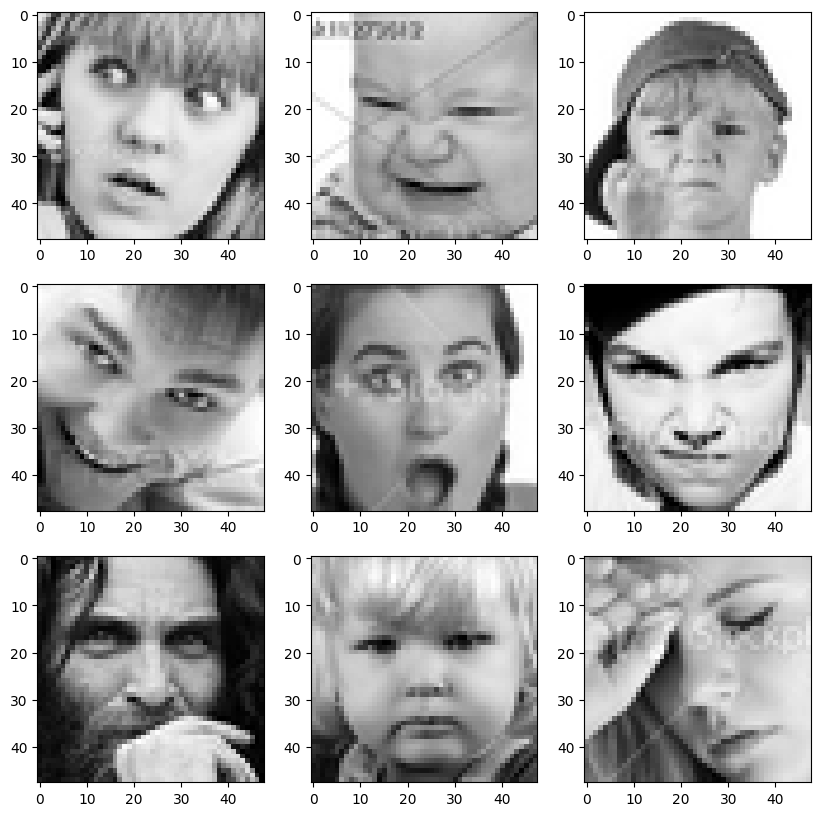

In [ ]:
labels = data.iloc[:, 0]
pixels = data.iloc[:, 1]
images = np.zeros((pixels.shape[0], 48*48))
for ix in range(images.shape[0]):
    p = pixels[ix].split(' ')
    for iy in range(images.shape[1]):
        images[ix, iy] = int(p[iy])
plt.figure(figsize = (10,10))
for index,image in enumerate(images[:9]):
    plt.subplot(3,3,index+1)
    plt.imshow(image.reshape((48,48)), cmap = 'gray')
plt.show()
train_or_test = data.iloc[:, 2].values

In [ ]:
data['emotion'].unique()

array(['Surprise', 'Disgust', 'Angry', 'Happy', 'Fear', 'Sad', 'Neutral'],
      dtype=object)

In [ ]:
reshaped_images = np.zeros((images.shape[0], 48, 48,1))
i = 0
for image in images:
  reshaped_images[i] = image.reshape((48,48,1))
  i+=1
reshaped_images.shape

(35882, 48, 48, 1)

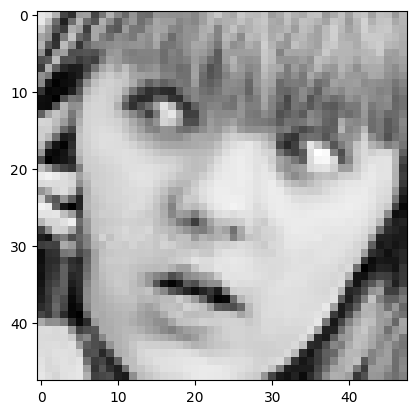

In [ ]:
norm_images = reshaped_images / 255.0
plt.imshow(norm_images[0].reshape((48,48)), cmap="gray")
plt.show()

In [ ]:
from tensorflow.keras.utils import to_categorical
new_labels = to_categorical(labels, num_classes=7)
new_labels.shape

(35882, 7)

In [ ]:
reshaped_images.shape

(35882, 48, 48, 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(norm_images, new_labels, test_size=0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28705, 48, 48, 1), (7177, 48, 48, 1), (28705, 7), (7177, 7))

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [ ]:
#Building up Model Architecture
model = Sequential()

model.add(Conv2D(64, (3,3), padding = "same", input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (5,5), padding = "same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3,3), padding = "same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3,3), padding = "same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation = "softmax"))

opt = Adam(lr = 0.0005)

model.compile(optimizer = opt, loss = "categorical_crossentropy", metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

In [ ]:
epochs = 100

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.00001, mode='auto')

checkpoint = ModelCheckpoint("fer_model.h5", monitor='val_loss',
                             mode='max', verbose=1)

callbacks = [checkpoint, reduce_lr]

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=callbacks, epochs = epochs)

Epoch 1/100
898/898 [==============================] - ETA: 0s - loss: 1.7930 - accuracy: 0.3202
Epoch 1: saving model to fer_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


898/898 [==============================] - 38s 26ms/step - loss: 1.7930 - accuracy: 0.3202 - val_loss: 1.7744 - val_accuracy: 0.3316 - lr: 0.0010
Epoch 2/100
896/898 [============================>.] - ETA: 0s - loss: 1.3434 - accuracy: 0.4900
Epoch 2: saving model to fer_model.h5
898/898 [==============================] - 22s 24ms/step - loss: 1.3430 - accuracy: 0.4902 - val_loss: 1.1931 - val_accuracy: 0.5548 - lr: 0.0010
Epoch 3/100
897/898 [============================>.] - ETA: 0s - loss: 1.1831 - accuracy: 0.5520
Epoch 3: saving model to fer_model.h5
898/898 [==============================] - 21s 23ms/step - loss: 1.1832 - accuracy: 0.5520 - val_loss: 1.3381 - val_accuracy: 0.4672 - lr: 0.0010
Epoch 4/100
895/898 [============================>.] - ETA: 0s - loss: 1.0799 - accuracy: 0.5903
Epoch 4: saving model to fer_model.h5
898/898 [==============================] - 22s 25ms/step - loss: 1.0802 - accuracy: 0.5902 - val_loss: 1.0943 - val_accuracy: 0.5858 - lr: 0.0010
Epoch 5/100

In [ ]:
# Checking the train and test loss and accuracy values from the neural network above.
train_loss = history.history['loss']
test_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']

Text(0.5, 0.92, 'Lineplots showing loss and accuracy of CNN model by epochs')

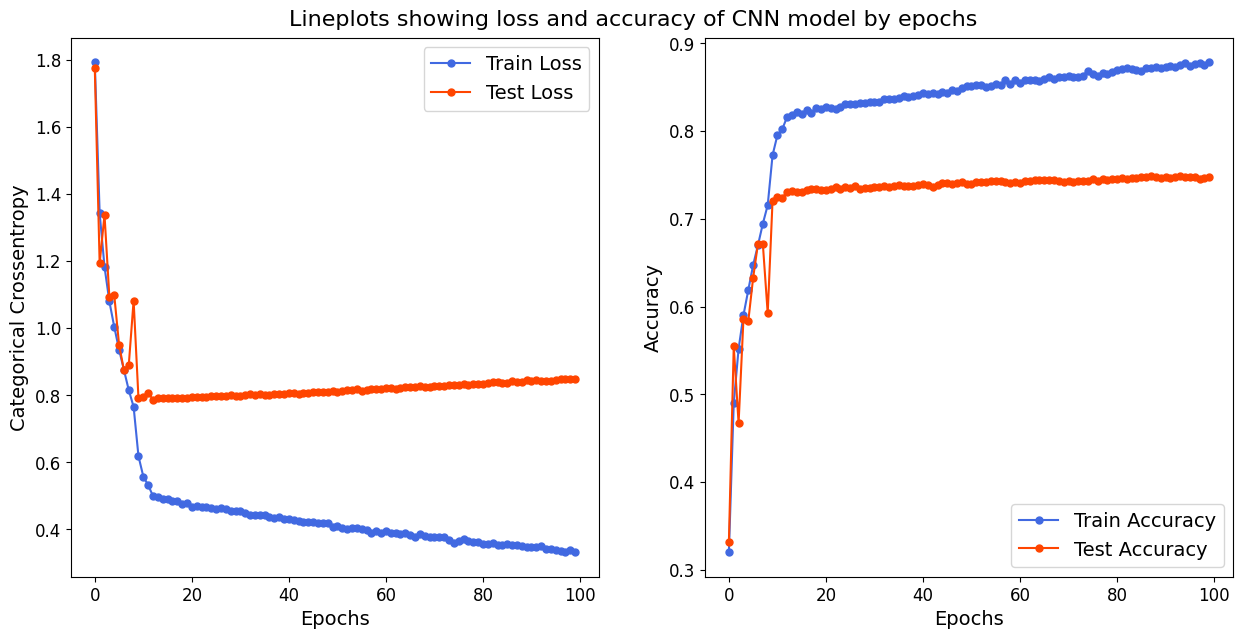

In [ ]:
# Plotting a line chart to visualize the loss and accuracy values by epochs.

fig, ax = plt.subplots(ncols=2, figsize=(15,7))

ax = ax.ravel()

ax[0].plot(train_loss, label='Train Loss', color='royalblue', marker='o', markersize=5)
ax[0].plot(test_loss, label='Test Loss', color = 'orangered', marker='o', markersize=5)

ax[0].set_xlabel('Epochs', fontsize=14)
ax[0].set_ylabel('Categorical Crossentropy', fontsize=14)

ax[0].legend(fontsize=14)
ax[0].tick_params(axis='both', labelsize=12)

ax[1].plot(train_accuracy, label='Train Accuracy', color='royalblue', marker='o', markersize=5)
ax[1].plot(test_accuracy, label='Test Accuracy', color='orangered', marker='o', markersize=5)

ax[1].set_xlabel('Epochs', fontsize=14)
ax[1].set_ylabel('Accuracy', fontsize=14)

ax[1].legend(fontsize=14)
ax[1].tick_params(axis='both', labelsize=12)

fig.suptitle(x=0.5, y=0.92, t="Lineplots showing loss and accuracy of CNN model by epochs", fontsize=16)

In [ ]:
import cv2
import numpy as np
from tensorflow import keras

# Load the saved model
model = keras.models.load_model('fer_model.h5')

# Define a function to detect emotions from an image
def detect_emotion(image_path):
    # Load and preprocess the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (48, 48))
    image = np.expand_dims(image, axis=-1)
    image = image / 255.0  # Normalize the image

    # Make a prediction using the loaded model
    emotions = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
    emotion_probabilities = model.predict(np.array([image]))
    predicted_emotion = emotions[np.argmax(emotion_probabilities)]

    return predicted_emotion, emotion_probabilities

# Example usage:
image_path_to_test = '/content/drive/MyDrive/bda/data/test/happy/S097_006_00000018.png'
predicted_emotion, emotion_probabilities = detect_emotion(image_path_to_test)

print("Predicted Emotion:", predicted_emotion)
print("Emotion Probabilities:", emotion_probabilities)


In [ ]:
from sklearn.metrics import accuracy_score
test_true = np.argmax(y_test, axis=1)
test_pred = np.argmax(model.predict(X_test), axis=1)
print("CNN Model Accuracy on test set: {:.4f}".format(accuracy_score(test_true, test_pred)))

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    cm = confusion_matrix(y_true, y_pred)
    classes = classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fig, ax = plt.subplots(figsize=(12,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [ ]:

from sklearn.metrics import classification_report, confusion_matrix
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

plot_confusion_matrix(test_true, test_pred, classes=emotion_labels, normalize=True, title='Normalized confusion matrix')
plt.show()